<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_Ascl1_MEFs_D22_specific_genes_sf5e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential V-plots of ATAC-seq data between MEFs and MEFs at day22 post Ascl1 induction to see specific genes with Ascl1 motif being more nucleosome occupied post Ascl1 induction

This task runs on SeATAC `v0.4.0`

In [10]:
start_time <- Sys.time()

### Install external packages

In [11]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "libgsl-dev is already the newest version (2.4+dfsg-6)."         
[5] "0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded."

In [12]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                         
[2] "Building dependency tree..."                                      
[3] "Reading state information..."                                     
[4] "libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded."

### Install R packages from CRAN

In [13]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler',
  'patchwork'
 )

In [15]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot',
  'VennDiagram'

also installing the dependencies ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘CNEr’, ‘DirichletMultinomial’, ‘seqLogo’, ‘TFMPvalue’, ‘sitmo’, ‘BSgenome’, ‘TFBSTools’, ‘FNN’, ‘RSpectra’, ‘RcppAnnoy’, ‘irlba’, ‘RcppProgress’, ‘dqrng’


Old packages: 'enrichplot', 'blob', 'broom', 'haven', 'RColorBrewer', 'scales',
  'vctrs'



In [16]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [17]:
install_github("GreenleafLab/chromVARmotifs")


* checking for file ‘/tmp/RtmpUA6M1M/remotes61475e2995/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
devtools::install_github("GuangchuangYu/ChIPseeker")

Skipping install of 'ChIPseeker' from a github remote, the SHA1 (59452691) has not changed since last install.
  Use `force = TRUE` to force installation



### Install `seatac` from github

In [19]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 12 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpUA6M1M/remotes6144528f3c/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, c

### Load R packages

In [20]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(clusterProfiler)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘igraph’


The following objects are masked from ‘package:rtracklayer’:

    blocks, path


The following object is masked from ‘package:Biostrings’:

    union


The following object is masked from ‘package:XVector’:

    path


The following object is masked from ‘package:clusterProfiler’:

    simplify


The following object is masked from ‘package:GenomicRanges’:

    union


The following object is masked from ‘package:IRanges’:

    union


The following object is masked from ‘package:S4Vectors’:

    union


The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are

### TensorFlow setup

In [21]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [22]:
Sys.time() - start_time

Time difference of 10.74142 mins

## Parameters

In [23]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,
  vae_num_peaks = 5000L,
  vae_latent = c(5L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  padjusted_cutoff = 0.05,
  log_ratio_cutoff = 0.1,
  upstream = -5000,
  downstream = 1000,
  pvalueCutoff = 1,
  qvalueCutoff = 1,
  nucleoatac_cutoff = 0.1,
  center_width = 100L # the center width
)

#MEFs

## Load data

In [24]:
remote_bam_files = c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam',
  MEF_Ascl1_D22 = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -cx %s', f))
}
local_bam_files <- gsub('https://', './', remote_bam_files)

In [25]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (f in remote_bed_files){
  system(sprintf('wget -cx %s', f))
}
local_bed_files <- gsub('https://', './', remote_bed_files)

### Read V-plots

In [26]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



In [27]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

number of training peaks for VaeModel: 4266

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



### Training VAE model for V-plots

As of 1/20/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [28]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3478.9967256 | loss_reconstruction= 3478.4729148 | loss_kl=    0.5238023

epoch=     2/   200 | beta=1.000e+00 | loss= 2779.7100256 | loss_reconstruction= 2777.9309728 | loss_kl=    1.7790430

epoch=     3/   200 | beta=1.000e+00 | loss= 2421.3223231 | loss_reconstruction= 2418.3525103 | loss_kl=    2.9698111

epoch=     4/   200 | beta=1.000e+00 | loss= 2018.2187033 | loss_reconstruction= 2016.4905288 | loss_kl=    1.7281813

epoch=     5/   200 | beta=1.000e+00 | loss= 1498.5299072 | loss_reconstruction= 1497.4675652 | loss_kl=    1.0623490

epoch=     6/   200 | beta=1.000e+00 | loss=  976.2948896 | loss_reconstruction=  975.6705969 | loss_kl=    0.6242978

epoch=     7/   200 | beta=1.000e+00 | loss=  611.9693675 | loss_reconstruction=  611.6894558 | loss_kl=    0.2799147

epoch=     8/   200 | beta=1.000e+00 | loss=  426.8502152 | loss_reconstruction=  426.7101907 | loss_kl=    0.1400218

epoch=     9/   200 | beta=1.000e+00 | loss=  34

## Call differential Ascl1 motif centric V-plots between MEF and D7 MEF by SeATAC

### Extract motif centric regions

In [29]:
data('homer_pwms') # 321 TF motifs from Homer database

In [30]:
j <- 9 # Ascl1
homer_pwms[j]

PWMatrixList of length 1
names(1): Ascl1(bHLH)/NeuralTubes-Ascl1-ChIP-Seq(GSE55840)/Homer

In [31]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [32]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 71616



### Read V-plots

In [33]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



### Get the latent representations of the V-plots

In [34]:
x <- model %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

#Read the regions for Vplots

In [35]:
res <- read.table('https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_Ascl1/name1=MEF_name2=MEF_D22_Ascl1/bin_size=5_fragment_size_range_max=640_fragment_size_interval=10_block_size=640/min_reads=10_vae_num_peaks=5000/vae_latent=5_vae_filters0=128_vae_filters=32_vae_downsample_layers=4_vae_upsample_layers=4_vae_epochs=200.tsv', header = TRUE, sep = '\t')

In [36]:
res <- GRanges(res)

In [37]:
sprintf('number of motif-centric regions: %s', length(res)) %>% message()

number of motif-centric regions: 71616



In [38]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 33594



#Vplots for specific genes

In [39]:
anno <- annotatePeak(res, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')

>> preparing features information...		 2022-04-15 08:56:26 PM 
>> identifying nearest features...		 2022-04-15 08:56:26 PM 
>> calculating distance from peak to TSS...	 2022-04-15 08:56:28 PM 
>> assigning genomic annotation...		 2022-04-15 08:56:28 PM 
>> adding gene annotation...			 2022-04-15 08:56:44 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 08:56:44 PM 
>> done...					 2022-04-15 08:56:44 PM 


In [40]:
dat <- data.frame(anno)

In [41]:
anno_res <- GRanges(dat)

##Hes1

In [42]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Hes1' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 1 range and 17 metadata columns:
      seqnames            ranges strand |    pvalue_z        padj
         <Rle>         <IRanges>  <Rle> |   <numeric>   <numeric>
  [1]    chr16 30070557-30071196      * | 2.67011e-10 1.30072e-05
      nucleosome_treatment nucleosome_control log_ratio        annotation
                 <numeric>          <numeric> <numeric>       <character>
  [1]             0.698415           0.467626  0.401144 Distal Intergenic
        geneChr geneStart   geneEnd geneLength geneStrand      geneId
      <integer> <integer> <integer>  <integer>  <integer> <character>
  [1]        16  30066338  30067319        982          1       15205
              transcriptId distanceToTSS            ENSEMBL      SYMBOL
               <character>     <numeric>        <character> <character>
  [1] ENSMUST00000161839.1          4219 ENSMUSG00000022528        Hes1
                    GENENAME
                 <character>
  [1] hes family bHLH tran..
  -------
  se

In [43]:
hes1 <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Hes1' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1 

In [44]:
x2 <- model %>% predict(x[hes1], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Hes1') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


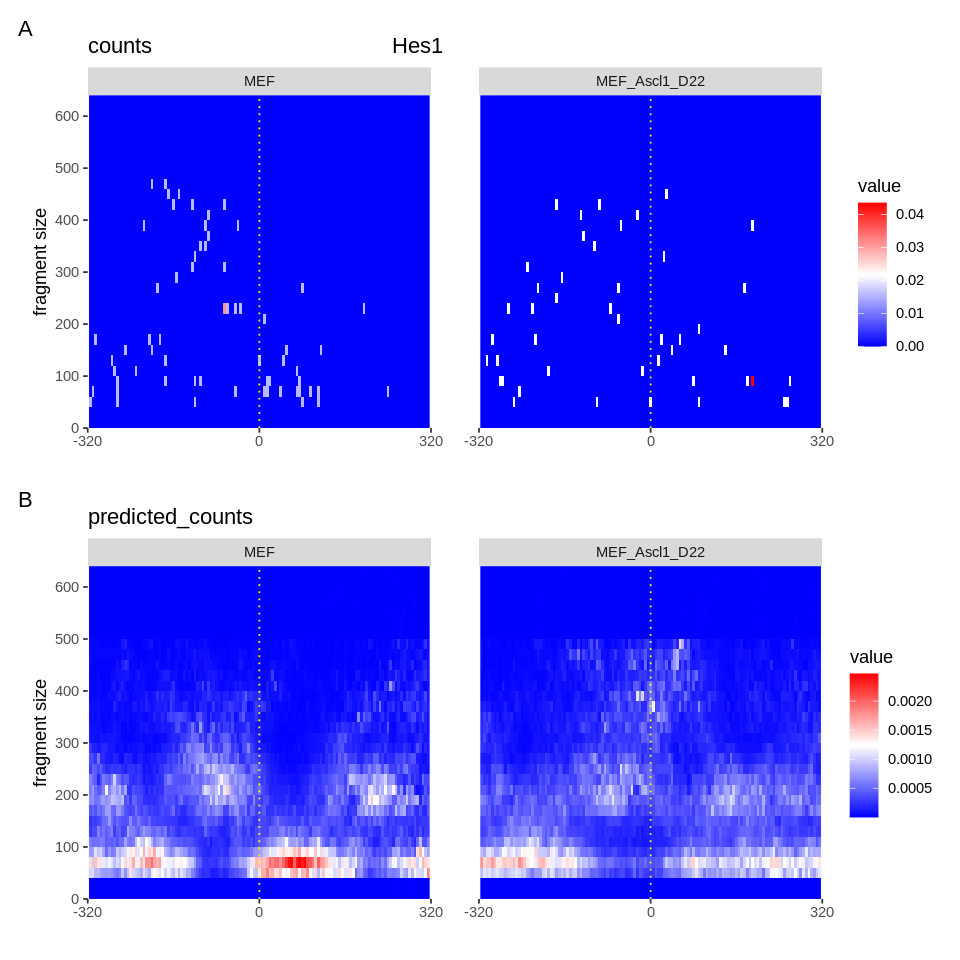

In [45]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

##Hmga2 

In [46]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Hmga2' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 2 ranges and 17 metadata columns:
      seqnames              ranges strand |    pvalue_z       padj
         <Rle>           <IRanges>  <Rle> |   <numeric>  <numeric>
  [1]    chr10 120558016-120558655      * | 1.32153e-07 0.00550045
  [2]    chr10 120558018-120558657      * | 4.49326e-08 0.00193520
      nucleosome_treatment nucleosome_control log_ratio        annotation
                 <numeric>          <numeric> <numeric>       <character>
  [1]             0.544752           0.395510  0.320155 Distal Intergenic
  [2]             0.541241           0.426216  0.238919 Distal Intergenic
        geneChr geneStart   geneEnd geneLength geneStrand      geneId
      <integer> <integer> <integer>  <integer>  <integer> <character>
  [1]        10 120361275 120476469     115195          2       15364
  [2]        10 120361275 120476469     115195          2       15364
              transcriptId distanceToTSS            ENSEMBL      SYMBOL
               <character>    

In [47]:
hmga2 <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Hmga2' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1 &
  abs(anno_res$nucleosome_control - 0.395510) < 0.001

In [48]:
x2 <- model %>% predict(x[hmga2], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Hmga2') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


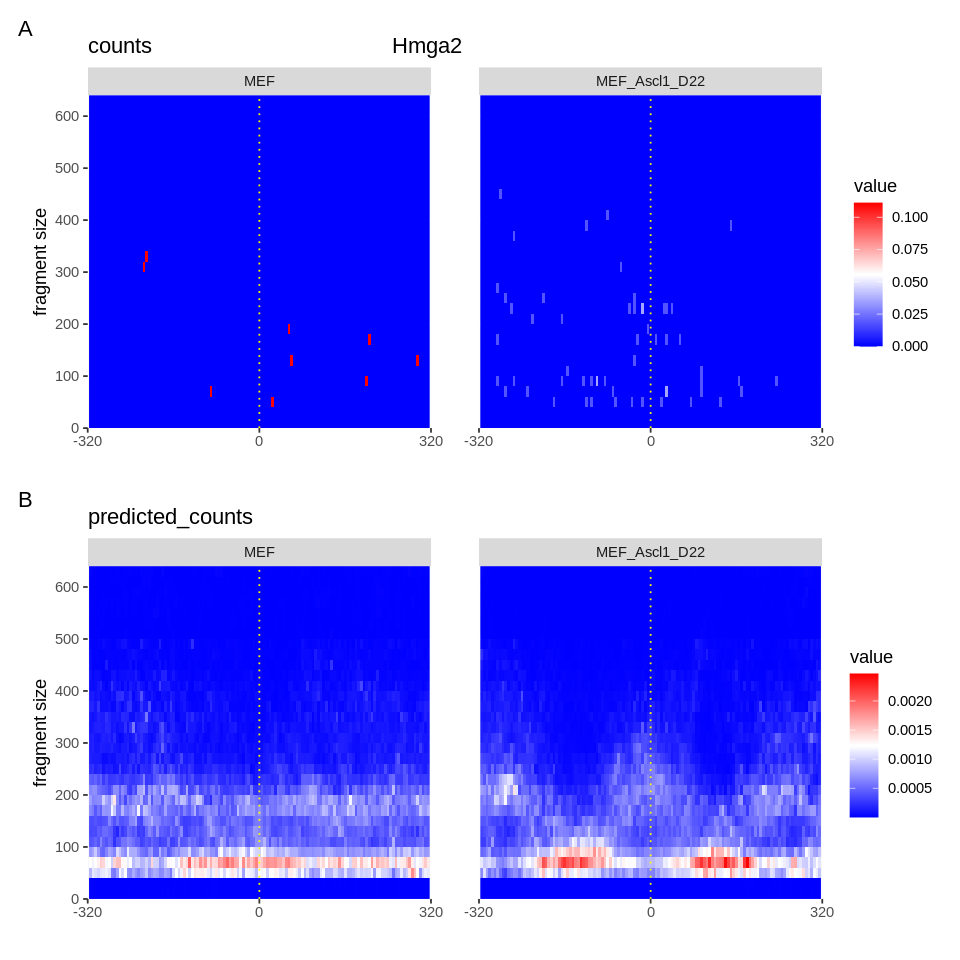

In [49]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

##Egfr 

In [50]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Egfr' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 4 ranges and 17 metadata columns:
      seqnames            ranges strand |    pvalue_z        padj
         <Rle>         <IRanges>  <Rle> |   <numeric>   <numeric>
  [1]    chr11 16769775-16770414      * | 2.22045e-16 1.28138e-11
  [2]    chr11 16895256-16895895      * | 3.33067e-15 1.87736e-10
  [3]    chr11 16895256-16895895      * | 3.33067e-15 1.87736e-10
  [4]    chr11 16904433-16905072      * | 5.26055e-09 2.40634e-04
      nucleosome_treatment nucleosome_control log_ratio             annotation
                 <numeric>          <numeric> <numeric>            <character>
  [1]             0.726498           0.460146  0.456692 Intron (ENSMUST00000..
  [2]             0.622667           0.524949  0.170710 Intron (ENSMUST00000..
  [3]             0.622667           0.524949  0.170710 Intron (ENSMUST00000..
  [4]             0.629113           0.433060  0.373435       Promoter (<=1kb)
        geneChr geneStart   geneEnd geneLength geneStrand      geneId
      

In [51]:
egfr <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Egfr' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1 &
  anno_res$annotation == 'Promoter (<=1kb)'

In [52]:
x2 <- model %>% predict(x[egfr], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Egfr') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


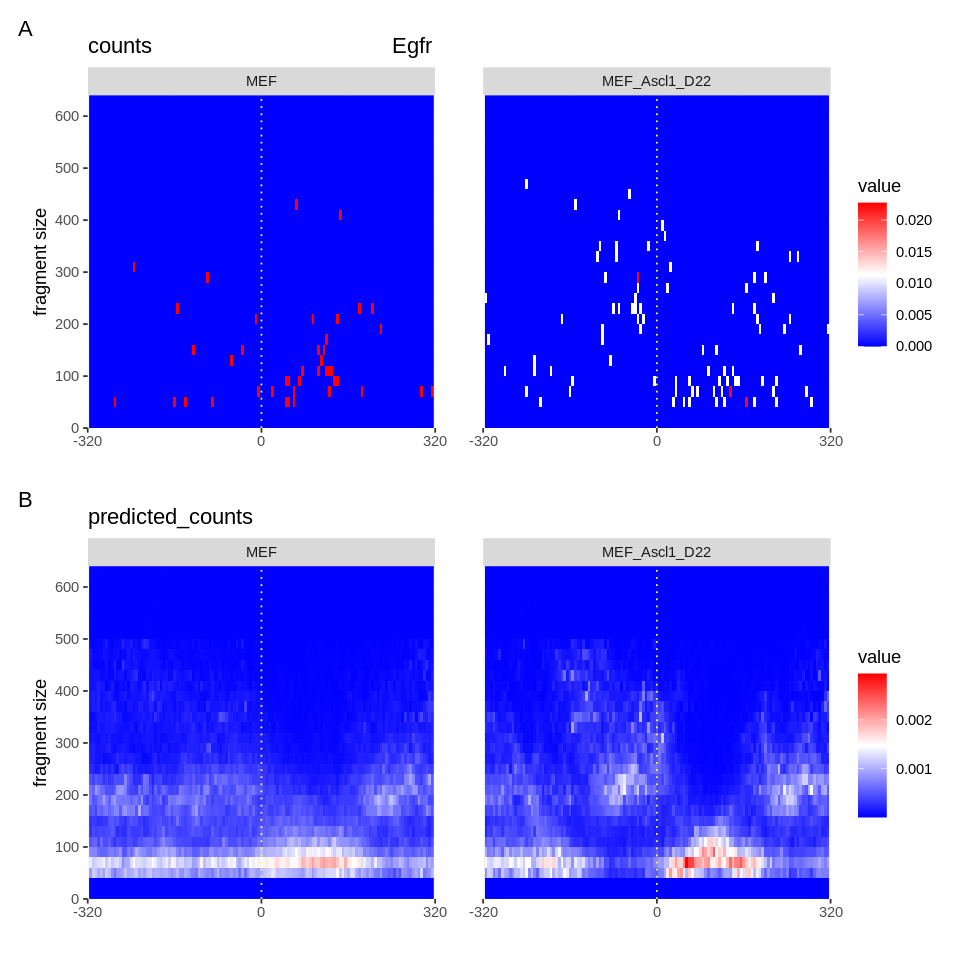

In [53]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

##Elf4 

In [54]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Elf4' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 2 ranges and 17 metadata columns:
      seqnames            ranges strand |    pvalue_z       padj
         <Rle>         <IRanges>  <Rle> |   <numeric>  <numeric>
  [1]     chrX 48463009-48463648      * | 2.29692e-08 0.00100959
  [2]     chrX 48463009-48463648      * | 2.29692e-08 0.00100959
      nucleosome_treatment nucleosome_control log_ratio       annotation
                 <numeric>          <numeric> <numeric>      <character>
  [1]             0.677472           0.551334  0.206027 Promoter (<=1kb)
  [2]             0.677472           0.551334  0.206027 Promoter (<=1kb)
        geneChr geneStart   geneEnd geneLength geneStrand      geneId
      <integer> <integer> <integer>  <integer>  <integer> <character>
  [1]        20  48411049  48463132      52084          2       56501
  [2]        20  48411049  48463132      52084          2       56501
              transcriptId distanceToTSS            ENSEMBL      SYMBOL
               <character>     <numeric>  

In [55]:
elf4 <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Elf4' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1 

In [56]:
x2 <- model %>% predict(x[elf4], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Elf4') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


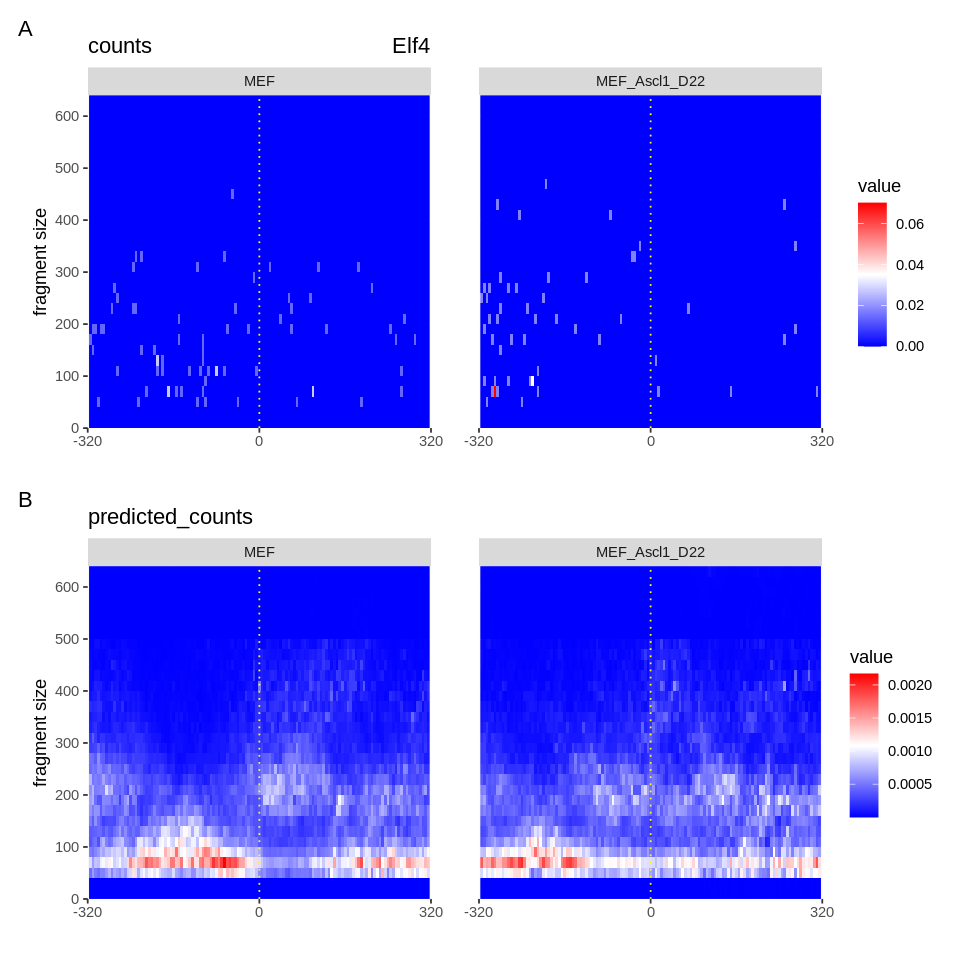

In [57]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

## SessionInfo

In [58]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] VennDiagram_1.7.3                        
 [2] futile.logger_1.4.3                      
 [3] igraph_1.3.0                             
 [4] chromVARmotifs_0.2.0                     
 [5] motifmatchr_1.16.0                       
 [6] BSgeno

In [59]:
Sys.time() - start_time

Time difference of 36.05009 mins